# Sample text corpus processing

In [14]:
settings={
    "corpus": "exempelkorpus",
    "lang": "sv",
    "textmode": "plain",
    "word_segmenter": "default_tokenizer",
    "sentence_segmentation": {
        "sentence_chunk": "paragraph",
        "sentence_segmenter": "default_tokenizer"
    },
    "paragraph_segmentation": {
        "paragraph_segmenter": "blanklines"
    },
    "positional_attributes": {
        "lexical_attributes": [ "pos", "msd", "lemma", ],
        "compound_attributes": [ ],
        "dependency_attributes": [ ],
        "sentiment": [ ]
    },
    "named_entity_recognition": [],
    "text_attributes": {
        "readability_metrics": [ ]
    }
}
import requests
import json
headers = {
    "Accept": "application/xml",
}
data = {
    'text': "Katten Gösta surfar på jobbet.",
} 
url = "https://ws.spraakbanken.gu.se/ws/sparv/v2/?settings={}".format(json.dumps(settings))
 
response = requests.post(url=url, headers=headers, data=data) 
  
print(response.text)


<result>
<build hash='8ab632e35412789e7595ed0f454ee4bf1b03937d'/>
<corpus link='https://ws.spraakbanken.gu.se/ws/sparv/v2/download?hash=8ab632e35412789e7595ed0f454ee4bf1b03937d'>
<text>
<paragraph>
<sentence id="8f7-8fd">
<w pos="NN" msd="NN.UTR.SIN.DEF.NOM" lemma="|katt|katten|">Katten</w>
<w pos="PM" msd="PM.NOM" lemma="|Gösta|">Gösta</w>
<w pos="VB" msd="VB.PRS.AKT" lemma="|surfa|">surfar</w>
<w pos="PP" msd="PP" lemma="|på|">på</w>
<w pos="NN" msd="NN.NEU.SIN.DEF.NOM" lemma="|jobb|">jobbet</w>
<w pos="MAD" msd="MAD" lemma="|">.</w>
</sentence>
</paragraph>
</text>
</corpus>
</result>



In [3]:
%%html
<style>
.jp-RenderedHTMLCommon td, .jp-RenderedHTMLCommon th, .jp-RenderedHTMLCommon tr {
    text-align: left;
    vertical-align: top;
}
</style>

## Statens offentliga utredningar (SOU)

Kungliga biblioteket har digitaliserat alla SOU:er publicerade mellan 1922 och 1999 (1129 stycken). Utredningarna kan laddas ned från http://regina.kb.se/sou/ i PDF-format. Filerna kan vara rätt stora, flera hundra MB, då de innehåller dels alla sidor scannade. De innehåller även inbäddad OCR:ad text vilket möjliggör textsökning. Kvaliteten av OCR är genomgående mycket hög.

[<img src="./images/kb_regina_sou.jpg" alt="http://regina.kb.se/sou/" width="80%"/>](http://regina.kb.se/sou/)
         
### Scannade dokument

| SOU 1933:15        | Page 23 | 
| ------------- |:-------------|
| [<img src="./images/kb-digark-2106487-page-0.jpg" alt="1933:15 Utredning och förslag angående importmonopol på kaffe" width="400"/>](https://weburn.kb.se/sou/211/urn-nbn-se-kb-digark-2106487.pdf)      | <img src="./images/kb-digark-2106487-page-23.jpg" alt="1933:15 Page 23" width="400"/> |

### Text har tolkats (med OCR) från de scannade dokumenten

OCR (Optical Character Recognition) innebär maskinell tolkning bilder till text. Processen kan dra nytta av typiska återkommande fel, ordlistor etc. för att få ett bättre resultat. Kvalitet av text är mycket beroende av kvalitet av källmaterial och OCR-processen i sig.

> 23 Enligt dessa siffror skulle sålunda **uuder** åren 1911—1913 43 % och år
1931 65 % av Sveriges import av orostat kaffe ha varit av brasilianskt
ursprung. Ingendera av dessa relationer är emellertid riktig, den första
dock i vida mindre mån än den sista. Före kriget var Tyskland ännu en
stor mellanhand för vår kaffehandel, liksom i viss utsträckning även
Danmark och Holland, Före 1905 voro dessa länder, framför allt Tysk-
land, såvitt kan slutas av den svenska handelsstatistiken, ännu mera do-
minerande — vi köpte vid denna tid så gott som allt vårt kaffe genom
affärshus i Hamburg, Rotterdam, Köpenhamn o. s. v. Efter tillkomsten
år 1904 av ett nytt svenskt rederiföretag med trafik på Syd- och Central-
amerika har bladet vänt sig. Redan år 1905 återfinnas Brasilien och
Centralamerika i vår importstatistik med införselsiffror av resp. 4-5 och
0\*3 milj. kg. från att förut ha varit obefintliga, och sedan dess har den
direkta införseln oavlåtligt stigit på den indirektas bekostnad. År 1931
redovisas enligt tab. 15 den direkta importen till 85 % av den totala och
importen från Brasilien till 65 %. I verkligheten torde omkr. 70—75 %
av vårt kaffe vara av brasilianskt ursprung. Danmark, Holland, Tysk-
land och England förmedla väsentligen vår import av dyrare kaffesor-
ter från Guatemala (vars export till stor del behärskas av den tyska
handeln), Mexiko, Costa Rica, Haiti, Java o. s. v.

Mer strukturerad information på sidan såsom tabeller, innehållsförteckning, index etc kan vara mycket problematiska, med ofta många fel i scanningen (beroende av material):

> T a b . 16. E x p o r t å r 1930 av brasilianskt kaffe.
U. S. A
Frankrike
Tyskland
Holland
Italien
Argentina • • • -
Sverige
Belgien
Övriga
Summa
1 000 säckar
å 60 kg.
8 006
1995
912
862
781
482
444
410
1399
15 291
52-4
13-o
6-0
5-6
5 i
3-2
2-9
27
9 1
lOOo

## Vilken information finns i texten?

- Geografiska platser på olika nivåer (länder, städer, världsdelar)
- Temporal information (år)
- Olika typer av **metriska värden**
- Ordklasser såsom substantiv, verb
- Prepositioner, konjunktioner kanske inte säger så mycket?


### Geografiska platser

> Enligt dessa siffror skulle sålunda uuder åren 1911—1913 43 % och år
1931 65 % av **Sveriges** import av orostat kaffe ha varit av **brasilianskt**
ursprung. Ingendera av dessa relationer är emellertid riktig, den första
dock i vida mindre mån än den sista. Före kriget var **Tyskland** ännu en
stor mellanhand för vår kaffehandel, liksom i viss utsträckning även
**Danmark** och **Holland**, Före 1905 voro dessa länder, framför allt **Tyskland**,
såvitt kan slutas av den svenska handelsstatistiken, ännu mera dominerande —
vi köpte vid denna tid så gott som allt vårt kaffe genom
affärshus i **Hamburg**, **Rotterdam**, **Köpenhamn** o. s. v. Efter tillkomsten
år 1904 av ett nytt **svenskt** rederiföretag med trafik på **Syd- och Centralamerika**
har bladet vänt sig. Redan år 1905 återfinnas **Brasilien** och
**Centralamerika** i vår importstatistik med införselsiffror av resp. 4-5 och
0\*3 milj. kg. från att förut ha varit obefintliga, och sedan dess har den
direkta införseln oavlåtligt stigit på den indirektas bekostnad. År 1931
redovisas enligt tab. 15 den direkta importen till 85 % av den totala och
importen från **Brasilien** till 65 %. I verkligheten torde omkr. 70—75 %
av vårt kaffe vara av **brasilianskt** ursprung. **Danmark**, **Holland**, **Tyskland** och **England**
förmedla väsentligen vår import av dyrare kaffesorter
från **Guatemala** (vars export till stor del behärskas av den **tyska**
handeln), **Mexiko**, **Costa Rica**, **Haiti**, **Java** o. s. v.
    
### Tidsmässiga angivelser

> Enligt dessa siffror skulle sålunda uuder **åren 1911—1913** 43 % och **år
1931** 65 % av Sveriges import av orostat kaffe ha varit av brasilianskt
ursprung. Ingendera av dessa relationer är emellertid riktig, den första
dock i vida mindre mån än den sista. **Före kriget** var Tyskland ännu en
stor mellanhand för vår kaffehandel, liksom i viss utsträckning även
Danmark och Holland, **Före 1905** voro dessa länder, framför allt Tyskland,
såvitt kan slutas av den svenska handelsstatistiken, ännu mera dominerande —
vi köpte **vid denna tid** så gott som allt vårt kaffe genom
affärshus i Hamburg, Rotterdam, Köpenhamn o. s. v. Efter tillkomsten
**år 1904** av ett nytt svenskt rederiföretag med trafik på Syd- och Centralamerika
har bladet vänt sig. Redan **år 1905** återfinnas Brasilien och
Centralamerika i vår importstatistik med införselsiffror av resp. 4-5 och
0\*3 milj. kg. från att förut ha varit obefintliga, och sedan dess har den direkta införseln oavlåtligt stigit på den indirektas bekostnad. År **1931**
redovisas enligt tab. 15 den direkta importen till 85 % av den totala och
av vårt kaffe vara av brasilianskt ursprung. Danmark, Holland, Tyskland och England
förmedla väsentligen vår import av dyrare kaffesorter
från Guatemala (vars export till stor del behärskas av den tyska
handeln), Mexiko, Costa Rica, Haiti, Java o. s. v.

### Vilka är nyckelorden?

> kanske **kaffe, handel, statistik, (länder), (år)**?

### Bara substantiv och egennamn (enligt Språkbanken Sparv)

> siffror uuder åren % år % Sveriges import kaffe ursprung relationer mån kriget Tyskland mellanhand kaffehandel utsträckning Danmark Holland länder Tyskland handelsstatistiken tid kaffe affärshus Hamburg Rotterdam Köpenhamn s. v. tillkomsten år rederiföretag trafik Syd- Centralamerika bladet år Brasilien Centralamerika importstatistik införselsiffror \ milj. kg införseln bekostnad År importen % kaffe ursprung Danmark Holland Tyskland England import kaffesorter Guatemala export del handeln Mexiko Costa Rica Haiti Java s. v.

### Bara substantiv och egennamn i deras grundform (enligt Språkbanken Sparv)

> siffra uuder år % år % Sverige import kaffe ursprung relation mån krig Tyskland mellanhand kaffehandel utsträckning Danmark Holland land Tyskland handelsstatistik tid kaffe affärshus Hamburg Rotterdam Köpenhamn s. o. s. v.:075 tillkomst år rederiföretag trafik Syd- Centralamerika blad år Brasilien Centralamerika importstatistik införselsiffror \ milj. kg införsel bekostnad år import % kaffe ursprung Danmark Holland Tyskland England import kaffesort Guatemala export del handel Mexiko Costa Rica Costa Rica:32 Haiti Java s. o. s. v.

### Efter enklare städningar
Korta ord borttagna, samt ord som saknar alfanumerisk bokstav, samt ord ändrade till genomgående små bokstäver

> siffra uuder sverige import kaffe ursprung relation mån krig tyskland mellanhand kaffehandel utsträckning danmark holland land tyskland handelsstatistik tid kaffe affärshus hamburg rotterdam köpenhamn v.:075 tillkomst rederiföretag trafik syd- centralamerika blad brasilien centralamerika importstatistik införselsiffror milj införsel bekostnad import kaffe ursprung danmark holland tyskland england import kaffesort guatemala export del handel mexiko costa rica costa rica:32 haiti java

### Top-10 lista av ord

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>token</th>
      <th>count</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>kaffe</td>
      <td>3</td>
    </tr>
    <tr>
      <th>1</th>
      <td>import</td>
      <td>3</td>
    </tr>
    <tr>
      <th>2</th>
      <td>tyskland</td>
      <td>3</td>
    </tr>
    <tr>
      <th>3</th>
      <td>danmark</td>
      <td>2</td>
    </tr>
    <tr>
      <th>4</th>
      <td>costa</td>
      <td>2</td>
    </tr>
    <tr>
      <th>5</th>
      <td>ursprung</td>
      <td>2</td>
    </tr>
    <tr>
      <th>6</th>
      <td>holland</td>
      <td>2</td>
    </tr>
    <tr>
      <th>7</th>
      <td>centralamerika</td>
      <td>2</td>
    </tr>
    <tr>
      <th>8</th>
      <td>sverige</td>
      <td>1</td>
    </tr>
    <tr>
      <th>9</th>
      <td>kaffehandel</td>
      <td>1</td>
    </tr>
  </tbody>
</table>


In [2]:
import nltk
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

def tokenize_and_sanitize(document):
    tokens = nltk.word_tokenize(document)

    # Ta bort ord kortare än tre tecken
    tokens = [ x for x in tokens if len(x) > 2 ]
    # Ta bort ord kortare än tre tecken
    tokens = [ x for x in tokens if any([c for c in x if c.isalpha()])]
    # Transformera till små bokstäver
    tokens = [ x.lower() for x in tokens ]
    # Ta bort de valigaste stoporden
    tokens = [ x for x in tokens if x not in nltk.corpus.stopwords.words('swedish') ]
    return tokens

def plot_freqdist(wf, n=25, **kwargs):
    data = list(zip(*wf.most_common(n)))
    x = list(data[0])
    y = list(data[1])
    labels = x

    plt.figure(figsize=(13,6))
    plt.plot(x, y, 'ro', **kwargs)
    plt.xticks(x, labels, rotation='45')
    plt.show()
    
text = 'siffra uuder år % år % Sverige import kaffe ursprung relation mån krig Tyskland mellanhand kaffehandel utsträckning Danmark Holland land Tyskland handelsstatistik tid kaffe affärshus Hamburg Rotterdam Köpenhamn s. o. s. v.:075 tillkomst år rederiföretag trafik Syd- Centralamerika blad år Brasilien Centralamerika importstatistik införselsiffror \ milj. kg införsel bekostnad år import % kaffe ursprung Danmark Holland Tyskland England import kaffesort Guatemala export del handel Mexiko Costa Rica Costa Rica:32 Haiti Java s. o. s. v.'

tokens = tokenize_and_sanitize(text)

wf = nltk.FreqDist(tokens)


print('Antal termer: {}'.format(wf.N()))
print('Antal unika termer (vocabulary): {}'.format(wf.B()))
print(' ')

print(' '.join(set(tokens)))
print(' ')

df = pd.DataFrame(wf.most_common(10), columns=['token','count'])
#display(HTML(df[:10].to_html()))

wf.tabulate(10)

Antal termer: 58
Antal unika termer (vocabulary): 47
 
java mellanhand centralamerika trafik rederiföretag hamburg sverige affärshus tillkomst milj importstatistik v.:075 syd- export tid holland införselsiffror krig siffra blad kaffesort mexiko rotterdam uuder rica kaffe del köpenhamn brasilien kaffehandel införsel costa ursprung import mån handelsstatistik danmark relation utsträckning rica:32 guatemala tyskland handel haiti bekostnad england land
 
         kaffe         import       tyskland centralamerika       ursprung        holland          costa        danmark         trafik  rederiföretag 
             3              3              3              2              2              2              2              2              1              1 


### Öppna textfil och läs in texten

In [3]:
import nltk
with open('./data/urn-nbn-se-kb-digark-2106487.txt', 'r') as f:
    document = f.read().replace('\n', '')
    
# Utskrift av de första och sista 250 tecknen:
print('{}\n.................\n\n.................\n{}'.format(document[:250], document[-250:]))

﻿National Libraryof SwedenDenna bok digitaliserades på Kungl. biblioteket år 2012J£-* A .STATENS OFFENTLIGA UTREDNINGAR 1 9 3 3 : 1 5F I N A N S D E P A R T E M E N T E TUTREDNING OCH FÖRSLAGA N G Å E N D EIMPORTMONOPOL PÅ KAFFEAVGIVNA DEN 15 MARS 19
.................

.................
n.Utrikes ärenden. Internationell rätt.Lagberedningens förslag ang. vissa internationel la rättsförhållanden. 4. Förslag till konvention mellan Sverige,Danmark, Finland, Island och Norge ang. konkurs,m. m. [4]Isaac Marcus Boktr.-Å.-B., Stockholm 193a


### Dela upp textmassan till ord
Texten som lästs in är än så länge, från systemets synvinkel, en enda lång sekvens av tecken. Vi vill upparbeta texten till en sekvens "relevanta" termer (ord, tal, etc). Vanligtvis används så kallade "white spaces" (blanksteg, tab, radbrytning etc) för att särskilja termer (tokens). De flesta ramverk för språkanalys (ex. NLTK) har inbyggda funktioner, s.k. tokenizers, för att dela up texten i termer. Vi listar de 500 vanligaste orden i fallande ordning.

Vi använder paketet Pandas för att få "snyggare" utskrifter. 

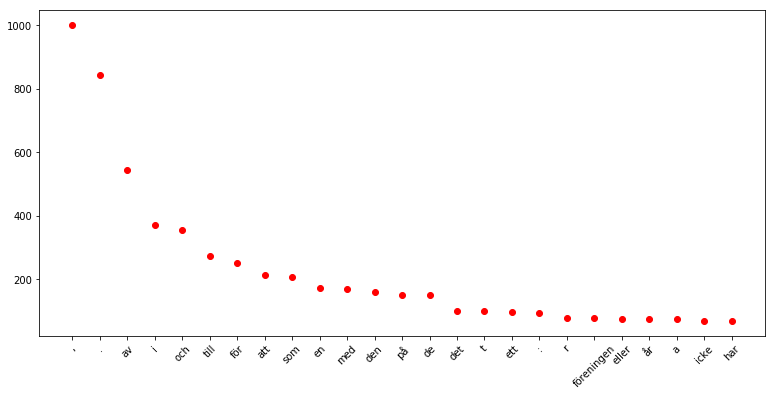

In [7]:
import nltk
import pandas as pd
from IPython.display import display, HTML
import matplotlib.pyplot as plt

%matplotlib inline
tokens = nltk.word_tokenize(document)
wf = nltk.FreqDist(tokens)
df = pd.DataFrame(wf.most_common(25), columns=['Token', 'Count']).reset_index()\
    .rename(columns={'index': 'Rank'})

#print('Antal termer: {}'.format(wf.N()))
#print('Antal unika termer: {}'.format(wf.B()))

#display(HTML(df.to_html()))


def plot_freqdist(wf, n=25):
    data = list(zip(*wf.most_common(n)))
    x = list(data[0])
    y = list(data[1])
    labels = x

    plt.figure(figsize=(13,6))
    plt.plot(x, y, 'ro')
    plt.xticks(x, labels, rotation='45')
    plt.show()

plot_freqdist(wf, n=25)
# ax = df.plot.scatter(x='Rank', y='Count', figsize=(13,6))



Fördelningen ser ut att följa [Zip's lag](https://simple.wikipedia.org/wiki/Zipf%27s_law):
> *Zipf's law states that given a large sample of words used, the frequency of any word is inversely proportional to its rank in the frequency table...

> ...*Given a set of Zipfian distributed frequencies, sorted from most common to least common, the second most common frequency will occur ½ as often as the first. The third most common frequency will occur ⅓ as often as the first. The fourth most common frequency will occur ¼ as often as the first. The nth most common frequency will occur 1⁄n as often as the first...* 

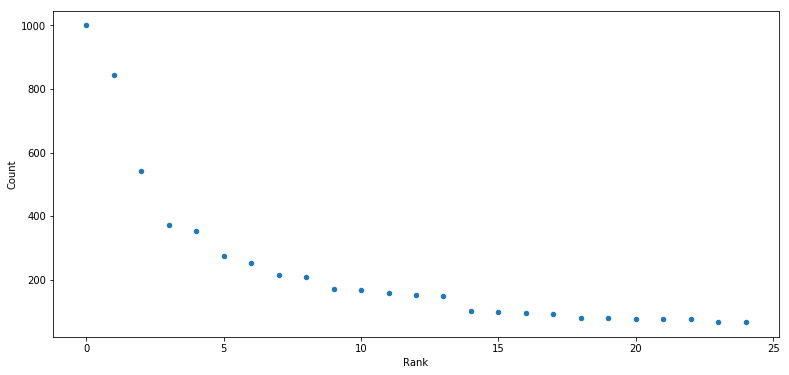

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
ax = df.plot.scatter(x='Rank', y='Count', figsize=(13,6))

### Städa texten
Vi ser mycket skräp och termer som inte är ord. Det är vanligt att städa texten genom att ex.
- ändra texten till genomgående små bokstäver
- ta bort termer som inte är är kort (ex. ett tecken)
- ta bort termer som innehåller siffror
- ta bort mest frekventa termerna (ofta kallade för stoppord)
- rad avslutas med "-" så ta bort "-" och radbrytning dvs slå samman avstavat ord


In [157]:
print(' '.join(nltk.corpus.stopwords.words('swedish')))

och det att i en jag hon som han på den med var sig för så till är men ett om hade de av icke mig du henne då sin nu har inte hans honom skulle hennes där min man ej vid kunde något från ut när efter upp vi dem vara vad över än dig kan sina här ha mot alla under någon eller allt mycket sedan ju denna själv detta åt utan varit hur ingen mitt ni bli blev oss din dessa några deras blir mina samma vilken er sådan vår blivit dess inom mellan sådant varför varje vilka ditt vem vilket sitta sådana vart dina vars vårt våra ert era vilkas


In [ ]:
import re

# hantera avstavningar
document = re.sub(r'(-\W*\n)', r'', document)

# splittra texten till tokens
tokens = nltk.word_tokenize(document)

# Ta bort ord kortare än tre tecken
tokens = [ x for x in tokens if len(x) > 2 ]
# Ta bort ord kortare än tre tecken
tokens = [ x for x in tokens if any([c for c in x if c.isalpha()])]
# Transformera till små bokstäver
tokens = [ x.lower() for x in tokens ]
# Ta bort de valigaste stoporden
tokens = [ x for x in tokens if x not in nltk.corpus.stopwords.words('swedish') ]

word_frequencies = nltk.FreqDist(tokens).most_common(500)

print('Antal termer: {}'.format(len(tokens)))
print('Antal unika termer (vocabulary): {}'.format(len(set(tokens))))

print(' '.join([x for x,_ in word_frequencies]))

#df = pd.DataFrame(word_frequencies, columns=['Token', 'Count']).reset_index().rename(columns={'index': 'Rank'})
#display(HTML(df.to_html()))


In [1]:
from nltk.corpus import stopwords
 
swedish_stopwords = set(stopwords.words('swedish'))
' '.join(swedish_stopwords)

'varit själv från vår vilka varför när våra ett du dess mitt och honom vårt det denna hans min åt i över sådant nu men den har oss ni sedan vara han hur vilken mig sådan sitta hon vad vars utan ha era så om med var blir vem än jag man inte alla din ert som en dem sina under vi någon något ut ju att ditt allt icke blev efter kunde sig på några vart sin då de sådana dina ej vilket inom mellan varje till ingen vilkas deras upp henne bli är hennes dessa här detta för mot av skulle där er blivit hade eller kan mina dig mycket samma vid'

In [56]:
import nltk
import ipywidgets as widgets
import pandas as pd

top_count_dropdown = widgets.IntSlider(min=10,max=500,step=1,value=10)

@widgets.interact(top=top_count_dropdown)
def create_tokens(top=25):
    tokens = nltk.word_tokenize(document.lower())
    words = nltk.FreqDist(tokens).most_common(top)
    df = pd.DataFrame(words, columns=["word", "count"])
    print(df)


interactive(children=(IntSlider(value=10, description='top', max=500, min=10), Output()), _dom_classes=('widge…

## Diskursanalys - vad handlar texten om?
Vilka ord, eller typer av ord kan "sammanfatta" vad texten handlar om - utan att redovisa specifika detaljer?  Nu tittar vi på all text i hela SOU-dokumentet ovan.

### Keyword extraction

Keyword extraction är ett enkelt sätt att skapa en översikt över texter genom att identifiera nyckelord i texten enligt den rankingalgoritm som metoden använder. TF-IDF, RAKE och TextRank är tre algoritmer för keyword extraction. RAKE viktar ord i ett enskilt dokument, utan hänsyn till föreomst i andra dokument, medan TF-IDF viktar (omvänt, inverterat) wordfrekvensen (TF, term frequency) i ett enskilt dokument mot hur ofta ordet förekommer i något dokument i hela korpuset (DF, document frequency).

References
- [TF-IDF](https://en.wikipedia.org/wiki/Tf%E2%80%93idf)
- [Automatic keyword extraction from individual documents by Stuart Rose, Dave Engel, Nick Cramer and Wendy Cowley](https://www.researchgate.net/profile/Stuart_Rose/publication/227988510_Automatic_Keyword_Extraction_from_Individual_Documents/links/55071c570cf27e990e04c8bb.pdf)
- [TextRank: Bringing Order into Texts by Rada Mihalcea and Paul Tarau](https://github.com/davidadamojr/TextRank)


In [3]:
import nltk

from corpora.zip_utility import ZipReader, store_documents_to_archive
from corpora.corpus_source_reader import SparvCorpusSourceReader

default_transforms = [
    lambda tokens: [ x.lower() for x in tokens ],
    lambda tokens: [ x for x in tokens if len(x) > 2 ],
    lambda tokens: [ x for x in tokens if any([c for c in x if c.isalpha()])],
    lambda tokens: [ x for x in tokens if x not in nltk.corpus.stopwords.words('swedish') ]
]

def convert_alto_xml_to_text(source_archive, target_archive, postags="", lemmatize=False, transforms=None, xslt_filename=None):
    source = ZipReader(source_archive, pattern='*.xml', filenames=None)
    documents = SparvCorpusSourceReader(source=source,
                                        transforms=(transforms or []),
                                        postags=postags,
                                        lemmatize=lemmatize,
                                        chunk_size=None,
                                        xslt_filename=xslt_filename)
    store_documents_to_archive(target_archive, documents)
    
# convert_alto_xml_to_text('./data/1945_10.zip', './data/1945_10_raw_text.zip', transforms=None, xslt_filename='./corpora/alto_xml_to_text.xslt')
convert_alto_xml_to_text('./data/SOU_1990.zip', './data/1990_nnpm_lc_gt2_nsw_lemma_text.zip', postags="|NN|PM|",
                         lemmatize=True, transforms=default_transforms)


In [5]:
import warnings
import nltk

warnings.filterwarnings("ignore", category=DeprecationWarning)

from corpora.zip_utility import ZipReader
from corpora.corpus_source_reader import SparvCorpusSourceReader

transforms = [
    lambda tokens: [ x.lower() for x in tokens ],
    lambda tokens: [ x for x in tokens if len(x) > 2 ],
    lambda tokens: [ x for x in tokens if x not in nltk.corpus.stopwords.words('swedish') ]
]
    
def get_demo_text_corpus(archive, postags="|NN|PM|", lemmatize=False, transforms=None):
    source = CompressedFileReader(archive, pattern='*.xml', filenames=None)
    documents = SparvCorpusSourceReader(source=source, transforms=(transforms or []), postags=postags, lemmatize=lemmatize, chunk_size=None, xslt_filename='./corpora/alto_xml_to_text.xslt')
    return documents

documents = get_demo_text_corpus('./data/1945_10.zip', postags="''", lemmatize=False, transforms=None)

w = next((x for x in documents))


if False:
    from rake_nltk import Rake
    r = Rake(language='swedish') # Uses stopwords for english from NLTK, and all puntuation characters.
    r.extract_keywords_from_text(' '.join(w[1][:500]))
    r.get_ranked_phrases() # To get keyword phrases ranked highest to lowest.


In [6]:
import zipfile
with zipfile.ZipFile('./data/1945_10_text.zip', 'w', zipfile.ZIP_DEFLATED) as xip:
    for (filename, document) in documents:
        xip.writestr(filename, ' '.join(document))
        

In [ ]:
import gensim.downloader as api
from gensim.models import TfidfModel
from gensim.corpora import Dictionary
dataset = api.load("text8")
next((x for x in dataset))
#dct = Dictionary(dataset)  # fit dictionary
#corpus = [dct.doc2bow(line) for line in dataset]  # convert corpus to BoW format
#model = TfidfModel(corpus)  # fit model
#vector = model[corpus[0]]  # apply model to the first corpus document


In [3]:
type(dataset)

text8.Dataset

### Part-of-Speech taggning (and Dependency Analysis)

https://spraakbanken.gu.se/korp/markup/msdtags.html
CoreNLP (Stanford Tagger)
https://spraakbanken.gu.se/sparv